# Homework 5 - Assignment 2

### Response authored by: JKtours (jlk635)

In [1]:
#Usual packages for import including spicy_stats

from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import scipy.stats


Populating the interactive namespace from numpy and matplotlib


# Instructions

Your notebook should show the distributions, the models, clearly state the H0 null hypothesis, and properly interpret the tests (remember captions, significance, etc etc)

# Response

## Test the difference between a Binomial distribution and a Gaussian distribution, changing the parameters of the Binomial (varying n, with p=0.2) using: 

*Note: varying n with p fixed (in this case, p = 0.2) for the binomial distribution is equivalent to varying the mean, as the mean $\mu$ = np*


## The NULL HYPOTHESES for each of the below tests are stated as follows:
### We are essentially testing whether there is a difference in distribution between Binomial and Gaussian. It is hypothesised that as the mean of the Binomial distribution increase (n increases), the distribution starts to behave the same as a Gaussian distribution.

**1) KS Null Hypothesis:** Distributions are the same
    
**2) AD Null Hypothesis:** A sample is drawn (in this case, we are testing binomial samples) from a population that follows a particular distribution (in this case normal)
    
**3) KL Null Hypothesis:** We're not formally doing a hypothesis test in this case. The calculated measure 'entropy' is a measure of how one probability distribution diverges from a second. If the entropy decreases, this indicates the distributions are similar, or getting closer; and if the entropy measure gets larger, the distributions are different. If we were doing a test, the null would be that the samples come from the same distribution, and we would reject the null hypothesis if the entropy measure is large (we need a criteria for 'large', which is not stated here). 
    
**4) Pearson's chisq (Goodness-of-fit) Null Hypothesis:** Categorical data (classification in bins of Binomial distribution histogram) has the same frequencies as another group of categorical data (classification in bins of Gaussian distribution histogram) 

#### Let first explore the binomial distribution, and compare plots for different values of n

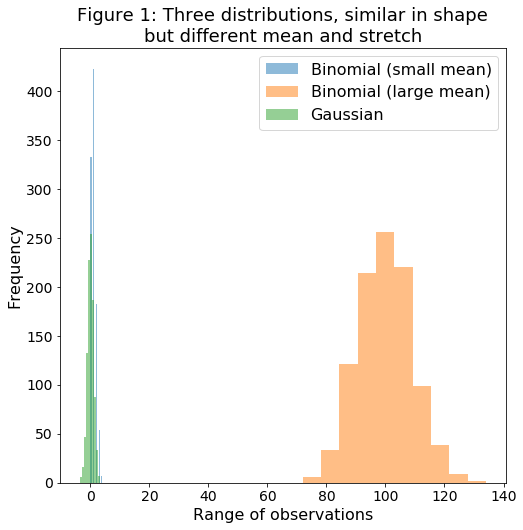

In [2]:
np.random.seed(999)
# poisson with 1000 elements, lambda=100 (high)
n_small, n_large, p = 5, 500, 0.2
dist_n = np.random.normal(0,1,1000)
dist_b_small = np.random.binomial(n_small, p, 1000)
dist_b_large = np.random.binomial(n_large, p, 1000)


pl.figure(figsize=(8,8))
pl.hist(dist_b_small , alpha=0.5, label="Binomial (small mean)")
pl.hist(dist_b_large , alpha=0.5, label="Binomial (large mean)")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend(fontsize = 16)
pl.tick_params(axis='both',labelsize=14)
pl.title("Figure 1: Three distributions, similar in shape\nbut different mean and stretch", fontsize = 18)
pl.xlabel("Range of observations", fontsize = 16)
pl.ylabel("Frequency", fontsize = 16)
pl.show()




#### Figure 1: In this case the means are different,  so the distributions will be different for KS and AD test. The binomial with large mean has a shape which is more Gaussian but I want the mean to be the same as for the Gaussian: mean=0. Similarly, the standard deviation is sqrt(n*p*(1-p)). We want it to be 1.

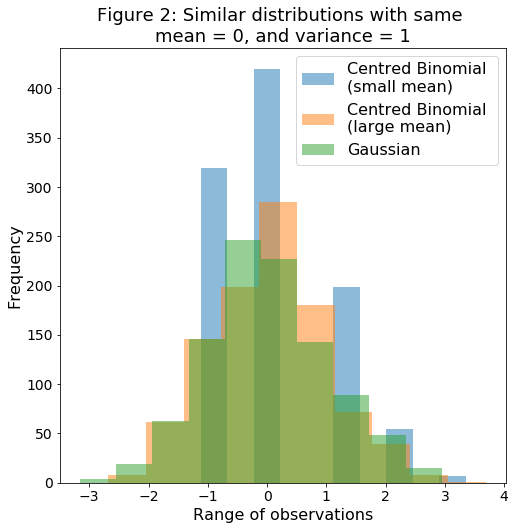

In [3]:

n_small, n_large, p = 5, 500, 0.2
dist_n = np.random.normal(0,1,1000)
dist_b_small = (np.random.binomial(n_small, p, 1000) - n_small * p)/ np.sqrt(n_small*p*(1-p)) #subtract mean divide by stdev
dist_b_large = (np.random.binomial(n_large, p, 1000) - n_large * p)/ np.sqrt(n_large*p*(1-p)) #subtract mean divide by stdev


pl.figure(figsize=(8,8))
pl.hist(dist_b_small , alpha=0.5, label="Centred Binomial \n(small mean)")
pl.hist(dist_b_large , alpha=0.5, label="Centred Binomial \n(large mean)")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend(fontsize = 16)
pl.tick_params(axis='both',labelsize=14)
pl.title("Figure 2: Similar distributions with same \nmean = 0, and variance = 1", fontsize = 18)
pl.xlabel("Range of observations", fontsize = 16)
pl.ylabel("Frequency", fontsize = 16)
pl.show()



#### Figure 2: In this case all three distributions have been centered (mean = 0) and scaled (standard deviation = 1). The KS and AD tests may return that the distributions are similar, although we need to test this. The Binomial distribution with larger mean appears to be a better fit to the Gaussian, and again we need to test this.

## Lets explore how the Binomial distribution changes for varying n 


In [4]:
possibleNinputs = np.array(range(500))+1
np.random.seed(888)
nInput = sorted(np.random.choice(possibleNinputs, size=100, replace=False))
sizeNinput = len(nInput)
binP = 0.2


Generate the binomial distribution for each n in the range (remember p (binP) is fixed as 20%).

In [5]:
#generate the distribution
alpha = 0.05
np.random.seed(888)
binSampleSize = 1000
ksSummary = np.zeros((sizeNinput,2))
adSummary = np.zeros((sizeNinput,2))
klSummary = np.zeros((sizeNinput,1))
chSummary = np.zeros((sizeNinput,2))

for i in range(sizeNinput):
    dist_Bin = (np.random.binomial(nInput[i-1], binP, binSampleSize) - nInput[i-1] * binP) / np.sqrt(nInput[i-1] * binP * (1-binP))
    
    #print(KS_result)
    
    ksSummary[i-1, 0] = scipy.stats.kstest(dist_Bin,'norm')[0]    # ksStat 
    ksSummary[i-1, 1] = scipy.stats.kstest(dist_Bin,'norm')[1]    # ksPval
    
    adSummary[i-1, 0] = scipy.stats.anderson(dist_Bin, dist='norm')[0] # adStat
    adSummary[i-1, 1] = scipy.stats.anderson(dist_Bin, dist='norm')[1][2] # adThreshold at alpha = 0.05
    
    # for KL and Pearson's chisq we need to simulate the normal distribution 
    theBaskets = np.linspace(min(dist_Bin), max(dist_Bin), 10) 
    basketCenters = theBaskets[:-1] + 0.5 * (theBaskets[1] - theBaskets[0])
    
    klSummary[i-1] =  scipy.stats.entropy(np.histogram(dist_Bin, bins=theBaskets)[0] / binSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters)) #klPval?
    
    chSummary[i-1, 0] = scipy.stats.chisquare(np.histogram(dist_Bin, bins=theBaskets)[0] / binSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters))[0] # chStat
    chSummary[i-1, 1] = scipy.stats.chisquare(np.histogram(dist_Bin, bins=theBaskets)[0] / binSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters))[1] # chPval
    
    

## Plots of results for Binomial random variables

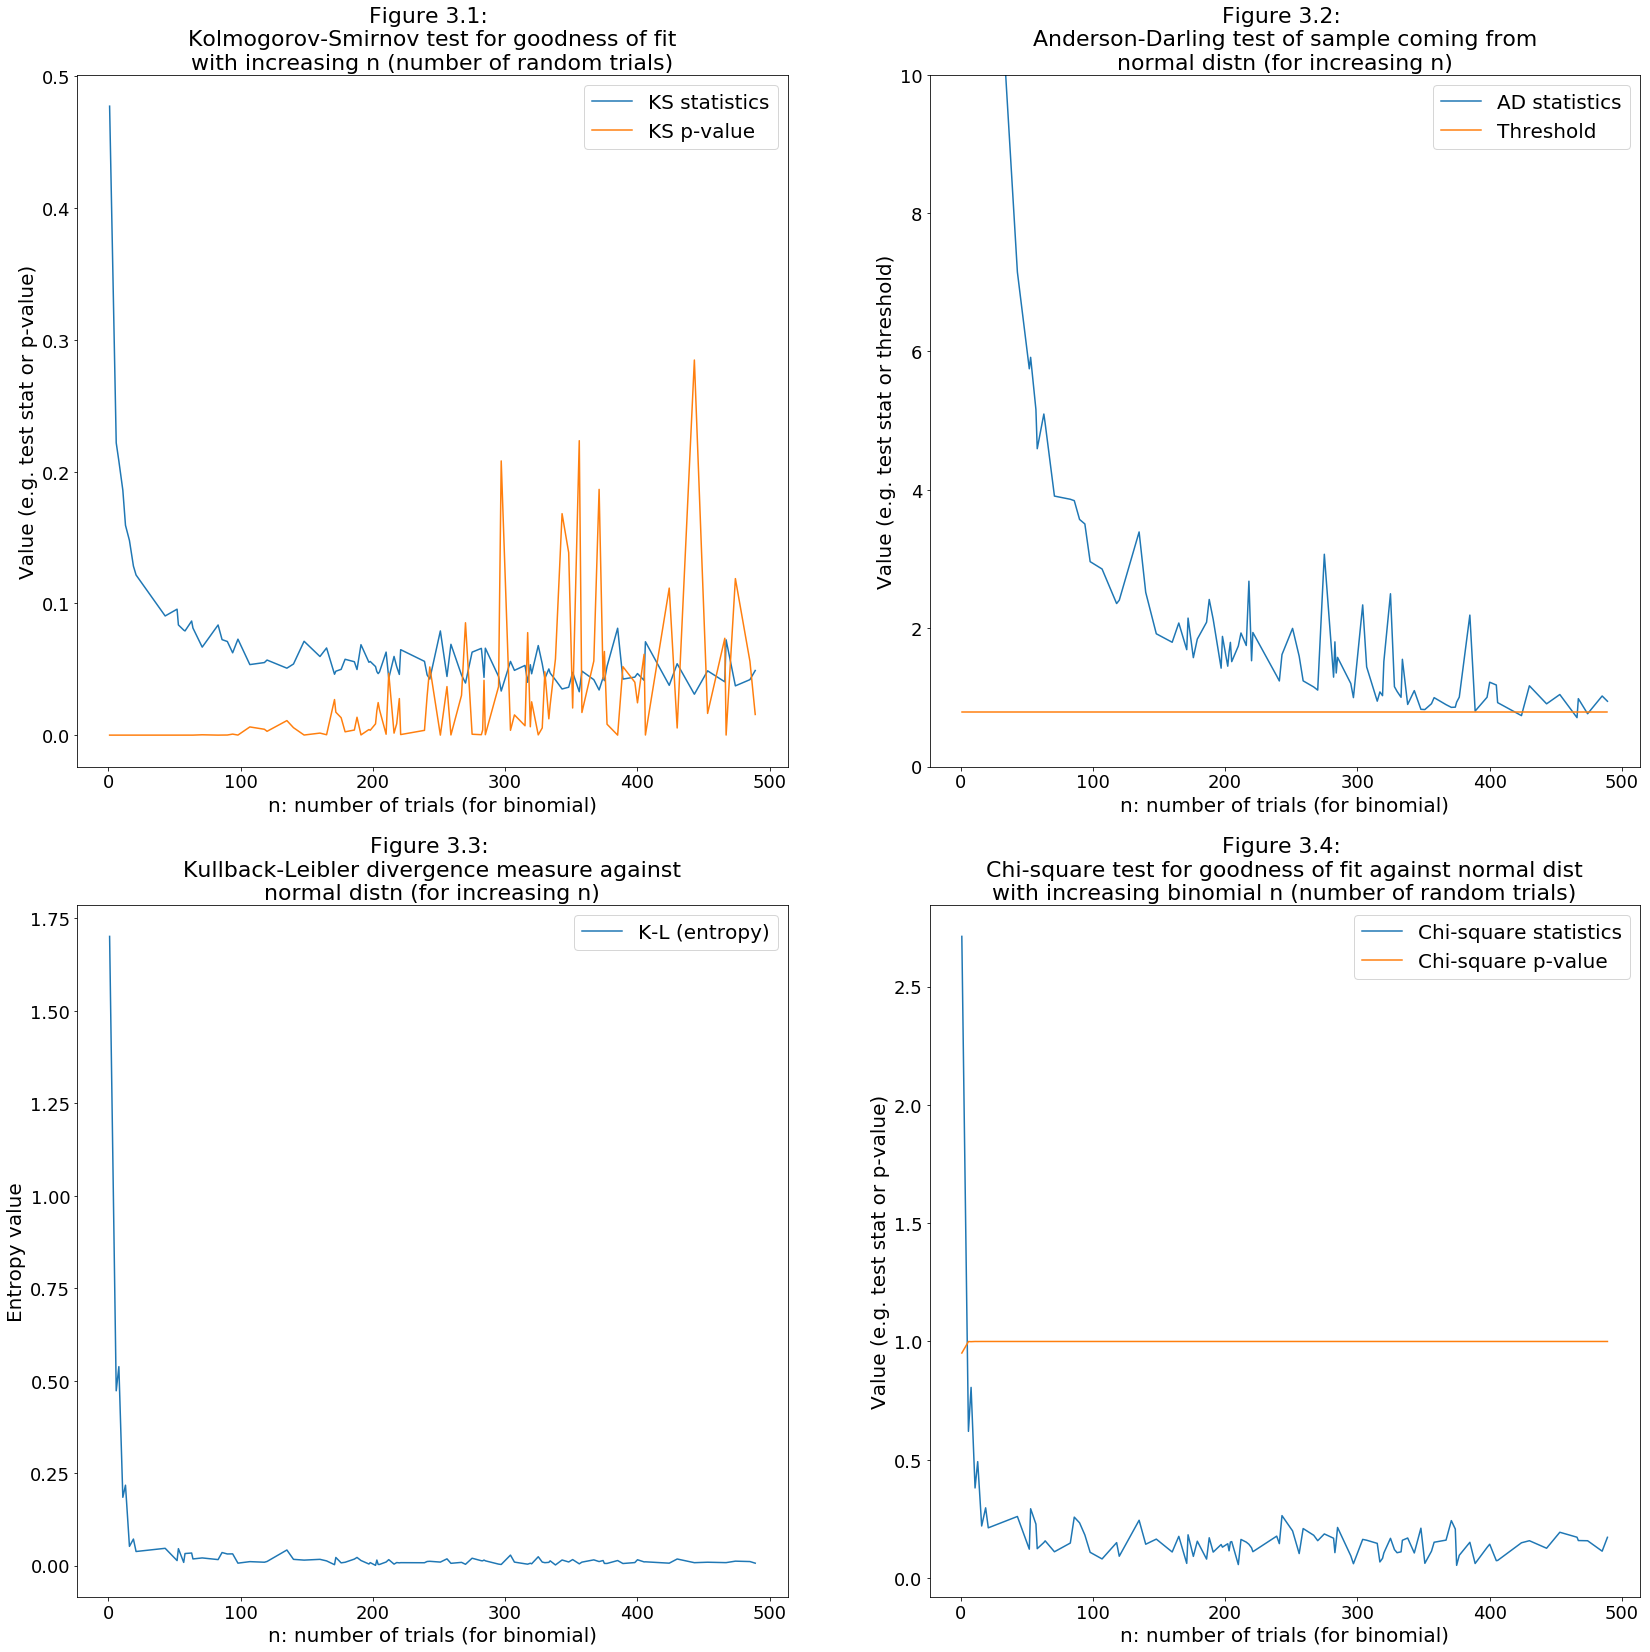

In [6]:

fig = pl.figure(figsize = (28,28))

fig.add_subplot(221)
pl.plot(nInput, ksSummary[ : , 0], label='KS statistics')
pl.plot(nInput, ksSummary[ : , 1], label='KS p-value')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 3.1: \n Kolmogorov-Smirnov test for goodness of fit \nwith increasing n (number of random trials)", fontsize = 22)
pl.xlabel("n: number of trials (for binomial)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or p-value)", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(222)
pl.plot(nInput, adSummary[ : , 0],  label='AD statistics')
pl.plot(nInput ,adSummary[ : , 1], label="Threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 3.2: \n Anderson-Darling test of sample coming from \nnormal distn (for increasing n)", fontsize = 22)
pl.xlabel("n: number of trials (for binomial)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or threshold)", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(223)
pl.plot(nInput , klSummary, label='K-L (entropy)')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 3.3: \n Kullback-Leibler divergence measure against \nnormal distn (for increasing n)", fontsize = 22)
pl.xlabel("n: number of trials (for binomial)", fontsize = 20)
pl.ylabel("Entropy value", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(224)
pl.plot(nInput, chSummary[ : , 0], label='Chi-square statistics')
pl.plot(nInput, chSummary[ : , 1], label='Chi-square p-value')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 3.4: \n Chi-square test for goodness of fit against normal dist \nwith increasing binomial n (number of random trials)", fontsize = 22)
pl.xlabel("n: number of trials (for binomial)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or p-value)", fontsize = 20)
pl.legend(fontsize=20);

# Commentary
Each of the above charts indicate that as n increases for the Binomial distribution, the observations start to resemble a Gaussian distribution.

**Figure 3.1:** As n increases, the KS test statistic decreases. The corresponding p-values start out small indicating a significant difference between the distribution (Binomial, and Gaussian); but as n increases, the p-value also increases (and bounces around), indicating for larger n we do not reject $H_0$ and conclude the sample (Binomial with large n) comes for the given distribution (Gaussian).

**Figure 3.2:** Interesting results observed here for Anderson-Darling analysis. As n increases, the AD statistic is converging below the threshold, but it doesn't get there. This indicates we continue to reject the null hypothesis (perhaps we need to sample larger n), and conclude the distributions are different for n upto 500. We should likely continue sampling and increase n to 1,000, or 10,000 and expect to see the test statistic decrease to below the threshold; but it hasn't done so here for now.

**Figure 3.3:** Entropy measure, as indicated above in statement of hypotheses. This isn't a formal test, although the entropy measure does measure how 'different' the distributions are. The chart shows entropy decreasing for increasing n, indicating that as the distributions are becoming more similar for larger n.

**Figure 3.4:** For increasing n, we do not reject the null hypothesis, and conclude the categorical data (classification in bins of Binomial distribution histogram) has the same frequencies as the group of categorical data (classification in bins of Gaussian distribution histogram). It's a weak test here, you can see the p-values get large (close to 1) quickly, meaning we fail to reject the null. Test statistics also 'small', hovering around 0.25.



# Testing the difference between a Poisson distribution and a Gaussian distribution, changing the parameters of the Poisson (varying mean) using:
    


## The NULL HYPOTHESES for each of the below tests are stated as follows:
### We are essentially testing whether there is a difference in distribution between Poisson and Gaussian. It is hypothesised that as the mean of the Poisson distribution increase (n increases), the distribution starts to behave the same as a Gaussian distribution.

**1) KS Null Hypothesis:** Distributions are the same
    
**2) AD Null Hypothesis:** A sample is drawn (in this case, we are testing Poisson samples) from a population that follows a particular distribution (in this case normal)
    
**3) KL Null Hypothesis:** We're not formally doing a hypothesis test in this case. The calculated measure 'entropy' is a measure of how one probability distribution diverges from a second. If the entropy decreases, this indicates the distributions are similar, or getting closer; and if the entropy measure gets larger, the distributions are different. If we were doing a test, the null would be that the samples come from the same distribution, and we would reject the null hypothesis if the entropy measure is large (we need a criteria for 'large', which is not stated here).
    
**4) Pearson's chisq (Goodness-of-fit) Null Hypothesis:** Categorical data (classification in bins of Poisson distribution histogram) has the same frequencies as another group of categorical data (classification in bins of Gaussian distribution histogram) 

#### Let first explore the Poisson distribution, and compare plots for different values of *$\lambda$*

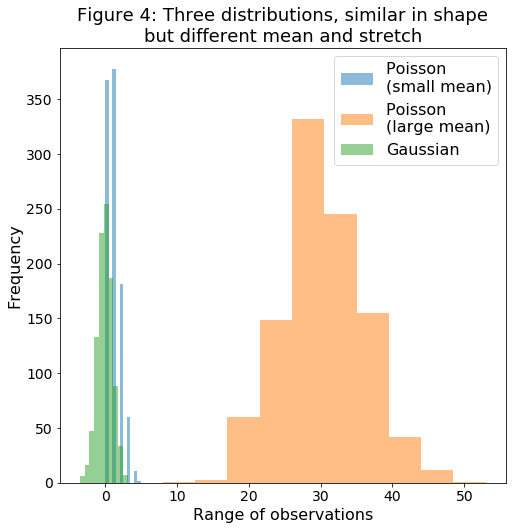

In [7]:
np.random.seed(999)
# poisson with 1000 elements, and small and large lambda lambda = 1 (low), lambda=30 (large)
lam_small, lam_large = 1, 30
dist_n = np.random.normal(0,1,1000)
dist_p_small = np.random.poisson(lam_small, 1000)
dist_p_large = np.random.poisson(lam_large, 1000)


pl.figure(figsize=(8,8))
pl.hist(dist_p_small , alpha=0.5, label="Poisson \n(small mean)")
pl.hist(dist_p_large , alpha=0.5, label="Poisson \n(large mean)")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend(fontsize = 16)
pl.tick_params(axis='both',labelsize=14)
pl.title("Figure 4: Three distributions, similar in shape\nbut different mean and stretch", fontsize = 18)
pl.xlabel("Range of observations", fontsize = 16)
pl.ylabel("Frequency", fontsize = 16)
pl.show()




#### Figure 4: In this case the means are different,  so the distributions will be different for KS and AD test. The Poission with large mean has a shape which is more Gaussian but we want the mean to be the same as for the Gaussian: mean=0. Similarly, the standard deviation is sqrt($\lambda$). We want it to be 1.

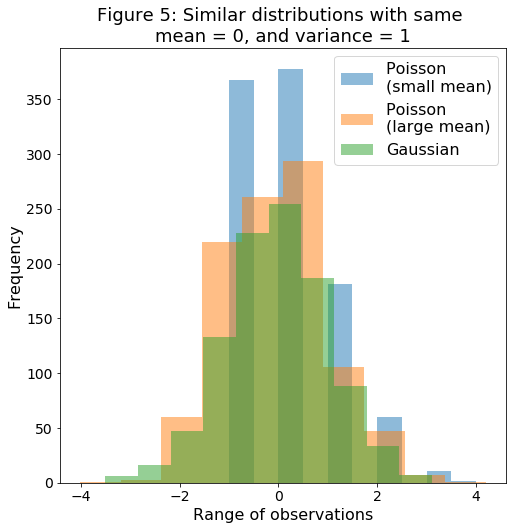

In [8]:

np.random.seed(999)
# poisson with 1000 elements, and small and large lambda lambda = 1 (low), lambda=30 (large)
lam_small, lam_large = 1, 30
dist_n = np.random.normal(0,1,1000)
dist_p_small = (np.random.poisson(lam_small, 1000) - lam_small) / np.sqrt(lam_small)
dist_p_large = (np.random.poisson(lam_large, 1000) - lam_large) / np.sqrt(lam_large)

pl.figure(figsize=(8,8))
pl.hist(dist_p_small , alpha=0.5, label="Poisson \n(small mean)")
pl.hist(dist_p_large , alpha=0.5, label="Poisson \n(large mean)")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend(fontsize = 16)
pl.tick_params(axis='both',labelsize=14)
pl.title("Figure 5: Similar distributions with same \nmean = 0, and variance = 1", fontsize = 18)
pl.xlabel("Range of observations", fontsize = 16)
pl.ylabel("Frequency", fontsize = 16)
pl.show()



#### Figure 5: In this case all three distributions have been centered (mean = 0) and scaled (standard deviation = 1). The KS and AD tests may return that the distributions are similar, although we need to test this. The Poisson distribution with larger mean ($\lambda$)  appears to be a better fit to the Gaussian, and again we need to test this.

In [9]:
lamInput = np.array(range(100))+1 #varying lambdas.. mean of the Poisson distribution
lamInputLen = len(lamInput)

Generate the Poisson distribution for each $\lambda$ in the range. A sample size of 250 has been chosen for each sampling of Poisson random variables (i.e. for each mean (in $lamInput$), a sample of 250 observations is drawn from a Poisson distribution with that given mean and variance).

In [10]:
#generate the distribution
alpha = 0.05
np.random.seed(666)
poissSampleSize = 250
ksSummary = np.zeros((lamInputLen,2))
adSummary = np.zeros((lamInputLen,2))
klSummary = np.zeros((lamInputLen,1))
chSummary = np.zeros((lamInputLen,2))

for i in lamInput:
    distPoiss = (np.random.poisson(lamInput[i-1], poissSampleSize) - lamInput[i-1]) / np.sqrt(lamInput[i-1])
    
    #print(KS_result)
    
    ksSummary[i-1, 0] = scipy.stats.kstest(distPoiss,'norm')[0]    # ksStat 
    ksSummary[i-1, 1] = scipy.stats.kstest(distPoiss,'norm')[1]    # ksPval
    
    adSummary[i-1, 0] = scipy.stats.anderson(distPoiss, dist='norm')[0] # adStat
    adSummary[i-1, 1] = scipy.stats.anderson(distPoiss, dist='norm')[1][2] # adThreshold at alpha = 0.05
    
    # for KL and Pearson's chisq we need to simulate the normal distribution 
    theBaskets = np.linspace(min(distPoiss), max(distPoiss), 10) 
    basketCenters = theBaskets[:-1] + 0.5 * (theBaskets[1] - theBaskets[0])
    
    klSummary[i-1] =  scipy.stats.entropy(np.histogram(distPoiss, bins=theBaskets)[0] / poissSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters)) #klPval?
    
    chSummary[i-1, 0] = scipy.stats.chisquare(np.histogram(distPoiss, bins=theBaskets)[0] / poissSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters))[0] # chStat
    chSummary[i-1, 1] = scipy.stats.chisquare(np.histogram(distPoiss, bins=theBaskets)[0] / poissSampleSize, 
                                    scipy.stats.norm.pdf(basketCenters))[1] # chPval
    
    

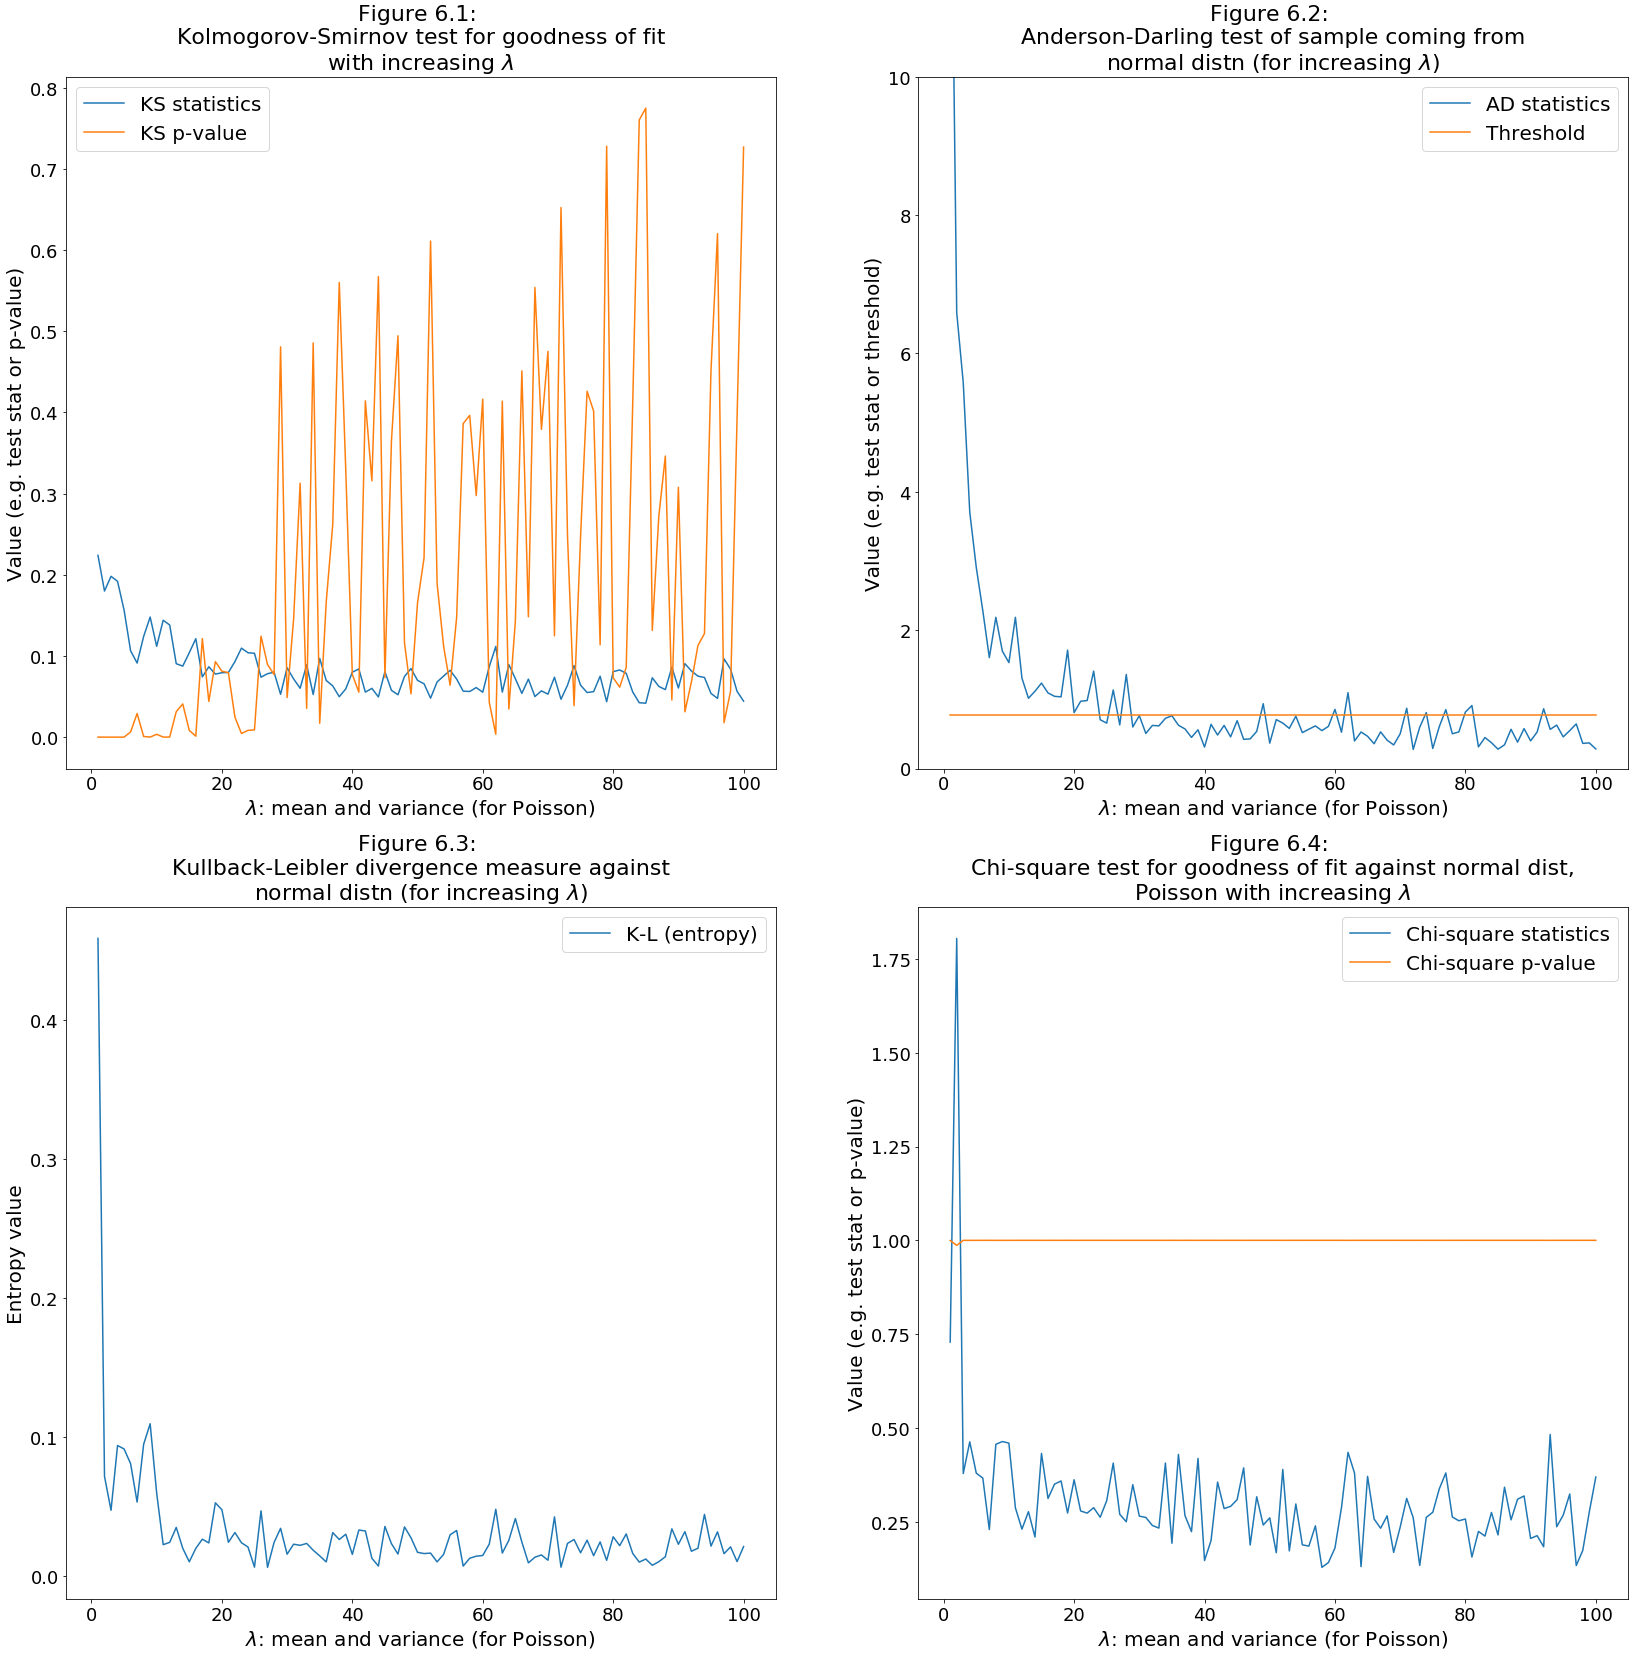

In [11]:

fig = pl.figure(figsize = (28,28))

fig.add_subplot(221)
pl.plot(lamInput, ksSummary[ : , 0], label='KS statistics')
pl.plot(lamInput, ksSummary[ : , 1], label='KS p-value')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 6.1: \n Kolmogorov-Smirnov test for goodness of fit \nwith increasing $\lambda$", fontsize = 22)
pl.xlabel("$\lambda$: mean and variance (for Poisson)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or p-value)", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(222)
pl.plot(lamInput, adSummary[ : , 0],  label='AD statistics')
pl.plot(lamInput ,adSummary[ : , 1], label="Threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 6.2: \n Anderson-Darling test of sample coming from \nnormal distn (for increasing $\lambda$)", fontsize = 22)
pl.xlabel("$\lambda$: mean and variance (for Poisson)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or threshold)", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(223)
pl.plot(lamInput , klSummary, label='K-L (entropy)')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 6.3: \n Kullback-Leibler divergence measure against \nnormal distn (for increasing $\lambda$)", fontsize = 22)
pl.xlabel("$\lambda$: mean and variance (for Poisson)", fontsize = 20)
pl.ylabel("Entropy value", fontsize = 20)
pl.legend(fontsize=20)

fig.add_subplot(224)
pl.plot(lamInput, chSummary[ : , 0], label='Chi-square statistics')
pl.plot(lamInput, chSummary[ : , 1], label='Chi-square p-value')
pl.tick_params(axis='both',labelsize=18)
pl.title("Figure 6.4: \n Chi-square test for goodness of fit against normal dist, \nPoisson with increasing $\lambda$", fontsize = 22)
pl.xlabel("$\lambda$: mean and variance (for Poisson)", fontsize = 20)
pl.ylabel("Value (e.g. test stat or p-value)", fontsize = 20)
pl.legend(fontsize=20);

# Commentary
Each of the above charts indicate that as n increases for the Poisson distribution, the observations start to resemble a Gaussian distribution.

**Figure 6.1:** As $\lambda$ increases, the KS test statistic decreases. The corresponding p-values start out small indicating a significant difference between the distribution (Poisson, and Gaussian); but as $\lambda$ increases, the quickly p-value also increases (and bounces around), indicating for larger $\lambda$ we do not reject $H_0$ and conclude the sample (Poisson with large $\lambda$) comes for the given distribution (Gaussian).

**Figure 6.2:** For the Anderson-Darling analysis, as $\lambda$ increases, the AD statistic is decreases below the threshold. This indicates for larger $\lambda$ we fail to reject the null hypothesis and conclude that the sample (Poisson) likely comes from the Gaussian underlying distribution.

**Figure 6.3:** Entropy measure, as indicated above in statement of hypotheses. This isn't a formal test, although the entropy measure does measure how 'different' the distributions are. The chart shows entropy decreasing for increasing $\lambda$, indicating that as the distributions are becoming more similar for larger $\lambda$.

**Figure 6.4:** For increasing $\lambda$, we do not reject the null hypothesis, and conclude the categorical data (classification in bins of Poisson distribution histogram) has the same frequencies as the group of categorical data (classification in bins of Gaussian distribution histogram). There's a spike observed in one of the very small values of $\lambda$ where the p-value also dips a little bit; although still not enough to indicate a significant difference.

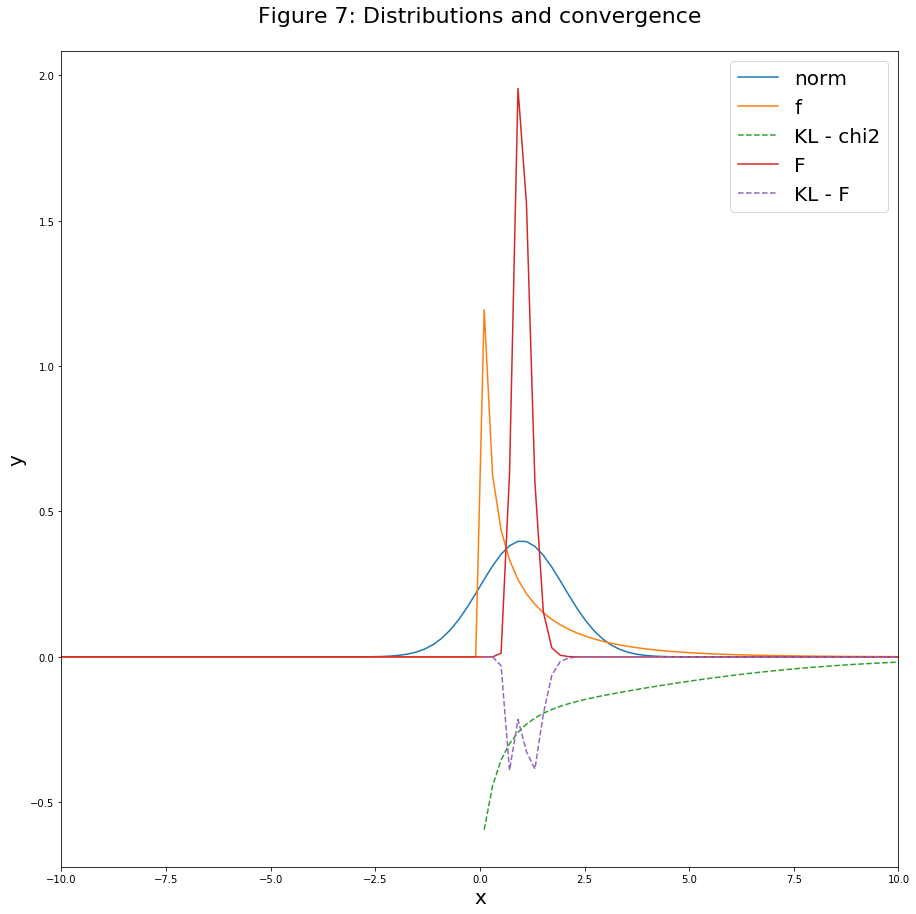

In [12]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);

pl.title("Figure 7: Distributions and convergence\n", fontsize = 22)
pl.xlabel("x", fontsize = 20)
pl.ylabel("y", fontsize = 20)
pl.legend(fontsize=20);

## END